In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from urllib.parse import urlparse
import nltk
import sklearn
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


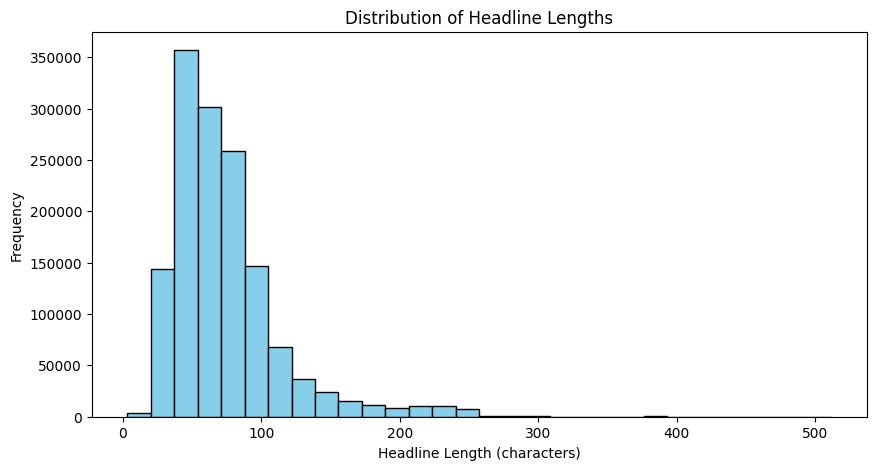

In [ ]:
#descriptive statistics
#Outlier detection and headline length analysis script
# Load your dataset
data = pd.read_csv('data/raw_analyst_ratings.csv')
# Ensure there is a 'headline' column (replace with 'title' or 'text' if needed)
assert 'headline' in data.columns, "Missing 'headline' column!"
# Calculate headline lengths
data['headline_length'] = data['headline'].astype(str).apply(len)
# Basic statistics
stats = data['headline_length'].describe()
print("Headline Length Statistics:")
print(stats)
# Histogram
plt.figure(figsize=(10, 5))
plt.hist(data['headline_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length (characters)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Group by publisher and stock, and count the number of articles
publisher_stock_counts = top_publishers_df.groupby(['publisher', 'stock']).size().unstack(fill_value=0)

print(publisher_stock_counts)
# Total number of publications per stock
publications_per_stock = df['stock'].value_counts().sort_index()
print(publications_per_stock)
# Data cleaning and validation script
df = pd.read_csv('data/raw_analyst_ratings.csv')
print(f"Number of rows after : {len(df_cleaned)}")
article_per_publication_date  = pd.to_datetime(df['date'], errors='coerce')
print(df['date'].head())
invalid_dates = df[df['date'].isnull()]
print(f"Invalid dates found: {len(invalid_dates)}")
counts_by_date = article_per_publication_date.dt.date.value_counts().sort_index()
print(counts_by_date)
# Count articles per stock 
print(f"Number of unique stocks: {df['stock'].unique()}")
counts_by_stock = df['stock'].value_counts().sort_index()
print(counts_by_stock)
# Get the top 10 publishers
article_per_publisher = df['publisher'].value_counts()
top10_publishers = article_per_publisher.head(10).index
# Filter the DataFrame 
top_publishers_df = df[df['publisher'].isin(top10_publishers)]
top10_stocks = df['stock'].value_counts().head(30)
print(top10_stocks)


stock                A   AA  AAC  AADR  AAL  AAMC  AAME  AAN  AAOI  AAON  ...  \
publisher                                                                 ...   
Benzinga Newsdesk   81  109   23     0  229    10     9   42    55    21  ...   
Benzinga Staff     438   76    3     0    0     0     4   11     0     3  ...   
Charles Gross       27  175   12     0    4     2     0   23    18     1  ...   
ETF Professor        0   29    0     2    0     0     0    0     0     0  ...   
Eddie Staley        27   65    5     0   29     1     2   10    17     5  ...   
Hal Lindon          36   72   10     0   10     3     7   18    13     4  ...   
Juan Lopez          33   30    0     0    5     0     0    5     1     0  ...   
Lisa Levin         126  253   57     0    0     6     6   80   114    14  ...   
Monica Gerson       68  216    2     0    0     2     5   21     2    34  ...   
Paul Quintaro      127  297   41     0   98    12    14   98    87    25  ...   

stock              ZOES  ZP

Number of publications for AAPL: 441
Number of publications for AMZN: 278
Number of publications for NVDA: 3146
Number of publications for TSLA: 1875
Number of publications for ['GOOG', 'GOOGL']: 2778
Number of publications for ['MSFT', 'MSF']: 12
Number of publications for ['META', 'FB']: 380


Text(0, 0.5, 'Publication Count')

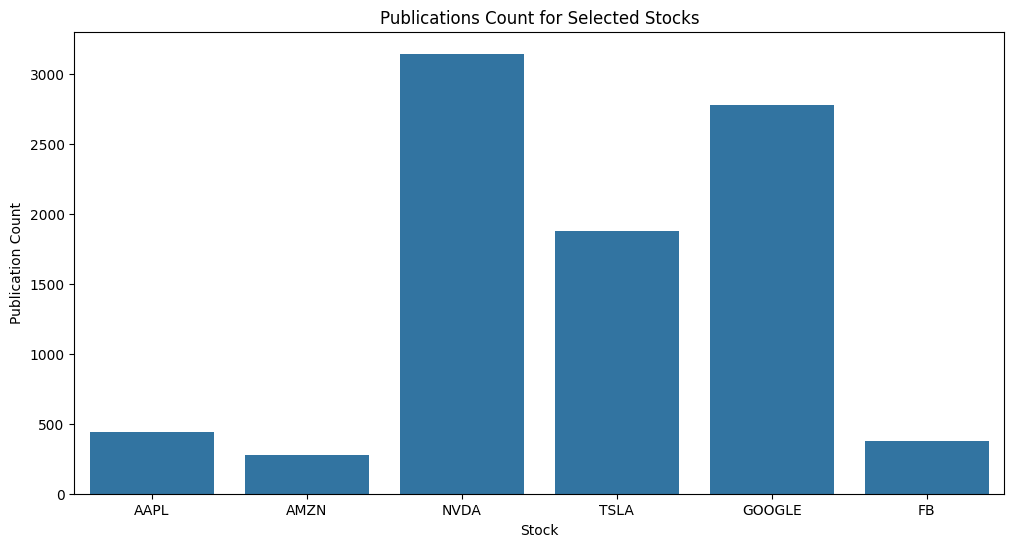

In [ ]:
# publications per stock with historical data
stock_name = 'AAPL'  
count = df[df['stock'] == stock_name].shape[0]
print(f"Number of publications for {stock_name}: {count}")
stock_name = 'AMZN'  
count = df[df['stock'] == stock_name].shape[0]
print(f"Number of publications for {stock_name}: {count}")
stock_name = 'NVDA'  
count = df[df['stock'] == stock_name].shape[0]
print(f"Number of publications for {stock_name}: {count}")
stock_name = 'TSLA'  
count = df[df['stock'] == stock_name].shape[0]
print(f"Number of publications for {stock_name}: {count}")
stock_names = ['GOOG', 'GOOGL']  
count = df[df['stock'].isin(stock_names)].shape[0]
print(f"Number of publications for {stock_names}: {count}")
stock_names = ['MSFT', 'MSF'] 
count = df[df['stock'].isin(stock_names)].shape[0]
print(f"Number of publications for {stock_names}: {count}")
stock_names = ['META', 'FB'] 
count = df[df['stock'].isin(stock_names)].shape[0]
print(f"Number of publications for {stock_names}: {count}")
# List of stocks with h6istorical data to plot
df_plot = df.copy()
df_plot['stock'] = df_plot['stock'].replace({'GOOG': 'GOOGLE', 'GOOGL': 'GOOGLE'})
selected_stocks = ['AAPL', 'AMZN', 'NVDA', 'TSLA', 'GOOGLE', 'FB']
# Filter the DataFrame for the selected stocks
df_selected = df_plot[df_plot['stock'].isin(selected_stocks)]
# Count publications for selected stocks
stock_counts = df_selected['stock'].value_counts().reindex(selected_stocks, fill_value=0)
# Plotting the counts of publications for selected stocks
plt.figure(figsize=(12, 6))
sns.barplot(x=stock_counts.index, y=stock_counts.values)
plt.title("Publications Count for Selected Stocks")
plt.xlabel("Stock")
plt.ylabel("Publication Count")

C:\Users\Yohanan\AppData\Local\Temp\ipykernel_7432\1210384644.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['date'].dt.to_period('M')


year_month
2011-04       6
2011-05      78
2011-06      96
2011-07     137
2011-08     149
           ... 
2020-02    2356
2020-03    4680
2020-04    4616
2020-05    9333
2020-06    5990
Freq: M, Name: count, Length: 111, dtype: int64
year
2011.0      760
2012.0     1187
2013.0     1240
2014.0     1189
2015.0     3695
2016.0     4223
2017.0     3581
2018.0     5395
2019.0     6325
2020.0    28392
Name: count, dtype: int64
weekday
Friday        9381
Monday       10322
Saturday       267
Sunday         436
Thursday     12688
Tuesday      11002
Wednesday    11891
Name: count, dtype: int64


Text(0, 0.5, 'Article Count')

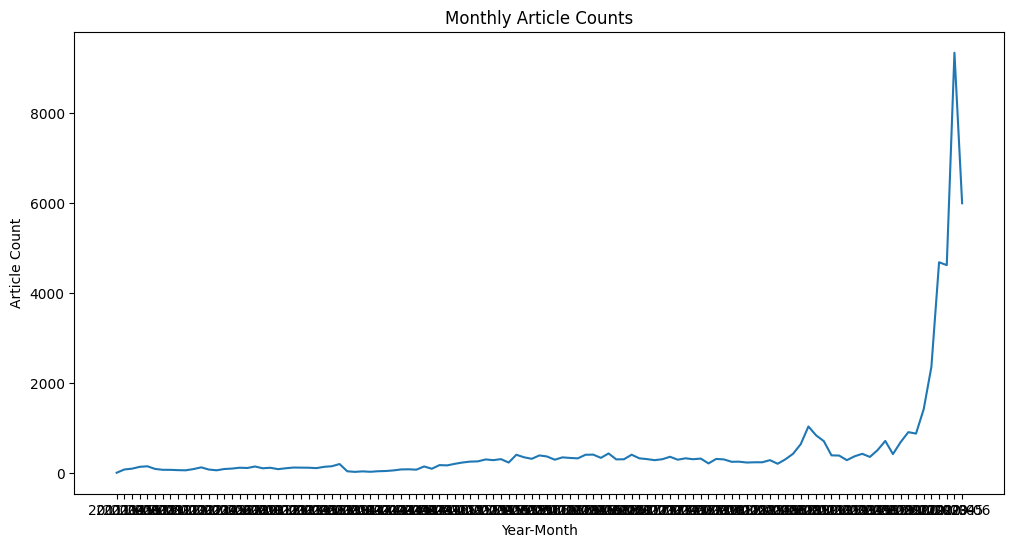

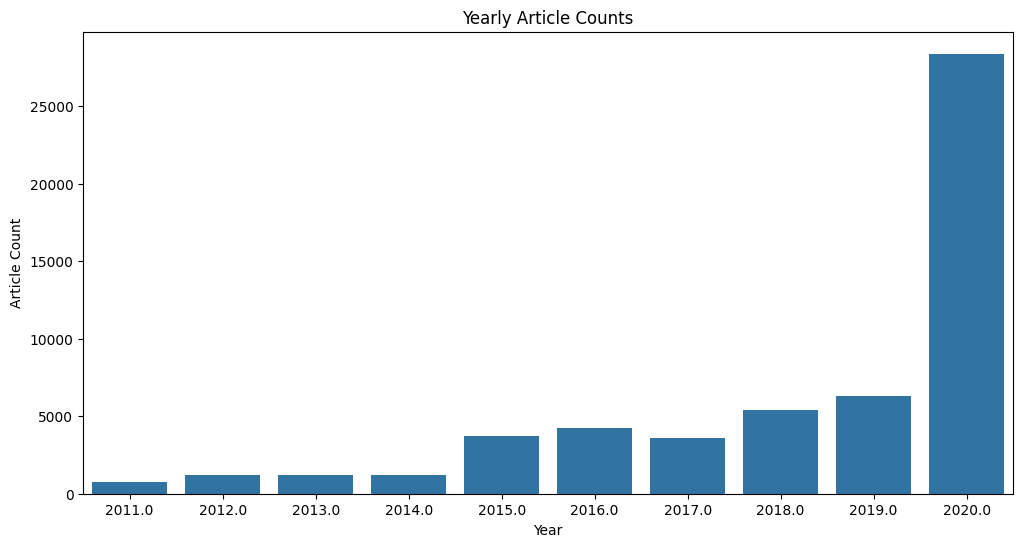

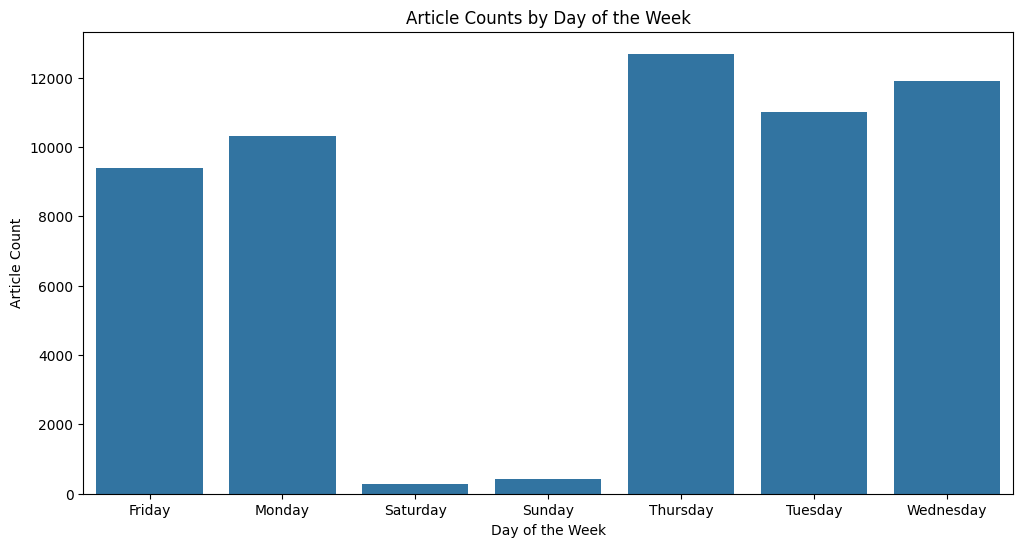

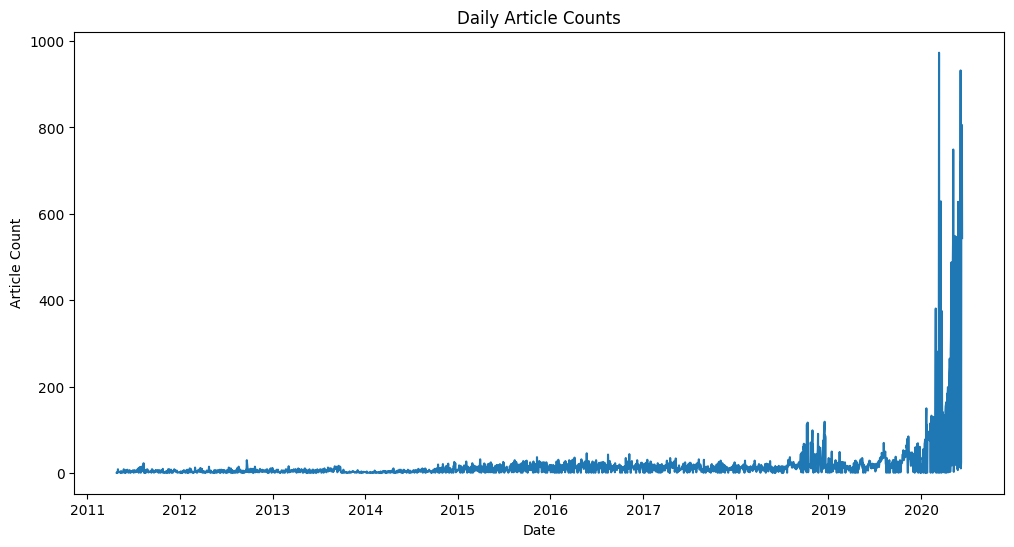

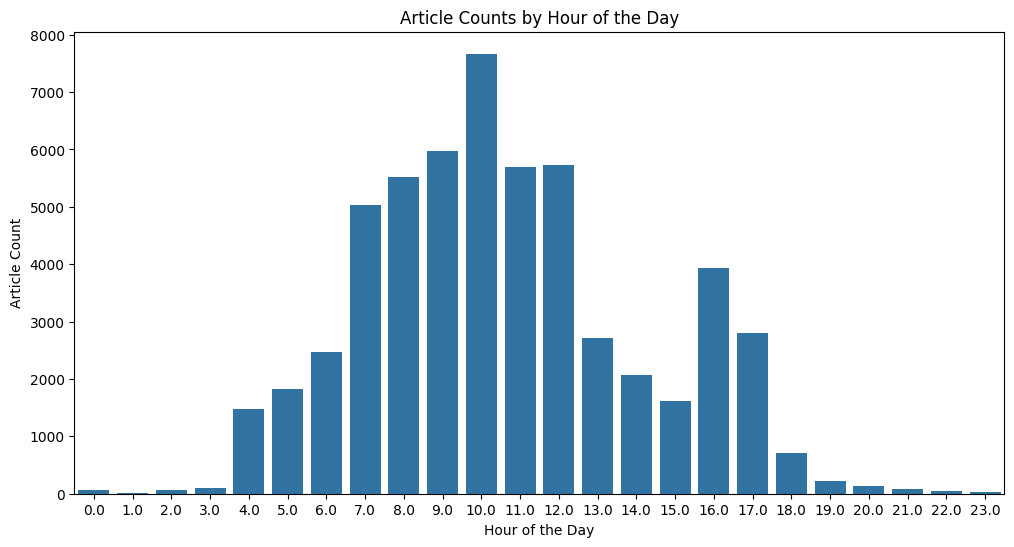

In [ ]:
# Time series analysis
# Extract date components
import matplotlib.pyplot as plt
import pandas as pd
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year_month'] = df['date'].dt.to_period('M')
df['weekday'] = df['date'].dt.day_name() 
df['hour'] = df['date'].dt.hour
df['day_only'] = df['date'].dt.date
# Count articles per month
monthly_counts = df['year_month'].value_counts().sort_index()
print(monthly_counts)
# Plotting the monthly counts
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values)
plt.title("Monthly Article Counts")
plt.xlabel("Year-Month")
plt.ylabel("Article Count")
# Count articles per year
yearly_counts = df['year'].value_counts().sort_index()
print(yearly_counts)
# Plotting the yearly counts
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title("Yearly Article Counts")
plt.xlabel("Year")
plt.ylabel("Article Count")
# Count articles per day of the week
weekday_counts = df['weekday'].value_counts().sort_index()
print(weekday_counts)
# Plotting the weekday counts
plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title("Article Counts by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Article Count")
# plot daily counts
daily_counts = df['day_only'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_counts.index, y=daily_counts.values)
plt.title("Daily Article Counts")
plt.xlabel("Date")
plt.ylabel("Article Count")
# plot hourly counts
hourly_counts = df['hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title("Article Counts by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Article Count")




In [ ]:
# text analysis
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string

nltk.download('stopwords')
nltk.download('punkt')

# Use the existing DataFrame 'df' and its 'headline' column
texts = df['headline'].dropna().astype(str).tolist()

# Preprocess the text data
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word not in string.punctuation and word not in stopwords.words('english')]
    return tokens

# Apply preprocessing
processed_texts = [preprocess_text(text) for text in texts]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Train the LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 402.4 kB/s eta 0:00:03
   ------------- -------------------------- 0.5/1.5 MB 402.4 kB/s eta 0:00:03
   -------------------- ------------------- 0.8/1.5 MB 420.4 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 420.4 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 420.4 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 420

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yohanan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yohanan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Yohanan/nltk_data'
    - 'c:\\Users\\Yohanan\\price-prediction-from-news-sentiment\\.venv\\nltk_data'
    - 'c:\\Users\\Yohanan\\price-prediction-from-news-sentiment\\.venv\\share\\nltk_data'
    - 'c:\\Users\\Yohanan\\price-prediction-from-news-sentiment\\.venv\\lib\\nltk_data'
    - 'C:\\Users\\Yohanan\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


C:\Users\Yohanan\AppData\Local\Temp\ipykernel_7432\3309476204.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='article_count', y='domain', data=domain_counts.head(10), palette='viridis')


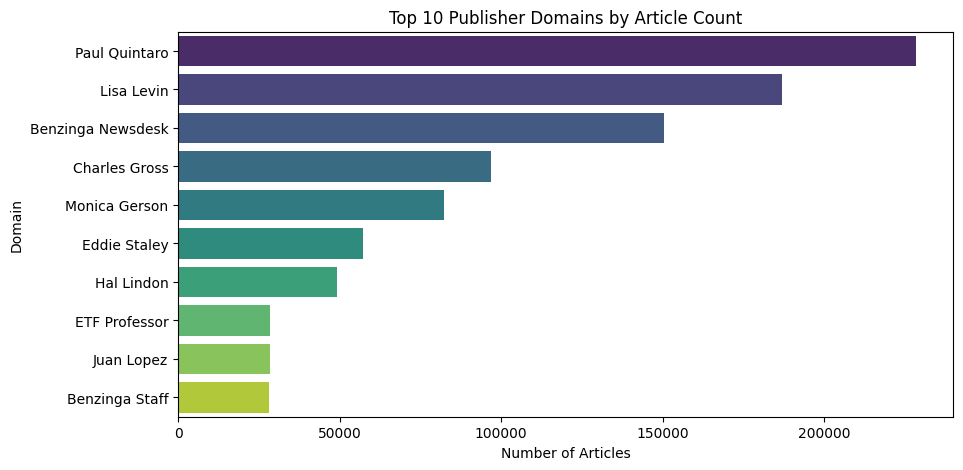

In [ ]:
# publishers who use email addresses  as publisher names
import re
def extract_domain(email):
    match = re.search(r'@([A-Za-z0-9.-]+)', email)
    return match.group(1) if match else email

data['publisher'] = data['publisher'].apply(extract_domain)

domain_counts = data['publisher'].value_counts().reset_index()
domain_counts.columns = ['domain', 'article_count']

plt.figure(figsize=(10, 5))
sns.barplot(x='article_count', y='domain', data=domain_counts.head(10), palette='viridis')
plt.title('Top 10 Publisher Domains by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Domain')
plt.show()